In [89]:
import camelot
import pandas as pd
import os

In [ ]:
'''
Procesamiento de pdfs formato texto: libreria Camelot
Toma las facturas en formato texto y las transforma. 
Para verificar:
Si funciona con el formato de todas las facturas. 
Si puedo leer las facturas imagenes y procesarlas luego con Camelot
'''

In [3]:
#Camelot para procesar pdfs con texto
tables = camelot.read_pdf('.\\pdf test\\test_text.pdf', flavor='stream', flag_size=True)
#Parsing Report, para ver como divide
tables[0].parsing_report
#Export en formato CSV
tables.export('foo.csv', f='csv', compress=False) # json, excel, html, markdown, sqlite
#Pasaje a DF 
tables[0].df

''' Otra forma de export:
tables[0].to_csv('foo.csv') # to_json, to_excel, to_html, to_markdown, to_sqlite

'''

0       1           2           3
0                     Services rendered                                
1                           Description  Hrs.Wk                   Total
2      Project Add - contingent expense       1   $1,624.40   $1,624.40
3        Travel Expense from 2022-09-24       1      $49.76      $49.76
4   Individual/Group Meal on 2022-10-05       1       $1.13       $1.13
5    Project Represent - Equipment part       1      $35.99      $35.99
6                 Project Scheduler I -    4.50      $31.42     $141.39
7          Project Add - Equipment part       1       $4.05       $4.05
8                Engineer (Principal) -       2      $13.47      $26.94
9                                             0       $0.00       $0.00
10                           Admin Fees       1      $68.54      $68.54
11              Project Our - Equipment       1   $3,648.00   $3,648.00
12         Client meeting on 2022-10-09       1     $176.13     $176.13
13  Individual/Group Meal on 2022-10-03       1      $20.16      $20.16
14          GIS Specialist -extra hours      54      $36.17   $1,953.18
15               Project At - Equipment       1      $68.80      $68.80
16       Travel Expense from 2022-09-19       1     $510.00     $510.00
17            Project Big - Credit note       1  -$1,600.80  -$1,600.80
18  Individual/Group Meal on 2022-10-11       1   $2,412.40   $2,412.40
19                Project Engineer -WFH      21     $131.00   $2,751.00
20                                            0       $0.00       $0.00
21                           Admin Fees       1     $132.25     $132.25
22         Project Modern - Credit note       1     -$56.28     -$56.28
23  Individual/Group Meal on 2022-10-15       1       $4.53       $4.53
24          Project At - Equipment part       1      $99.52      $99.52
25     Project Our - contingent expense       1   $1,441.00   $1,441.00
26       Travel Expense from 2022-09-28       1      $44.09      $44.09
27  Individual/Group Meal on 2022-10-17       1       $0.00       $0.00
28         Project Scheduler I -support   13.60     $116.00   $1,577.60
29                                            0       $0.00       $0.00
30       Travel Expense from 2022-09-24       1     $175.20     $175.20
31  Individual/Group Meal on 2022-10-12       1       $0.38       $0.38
32         Project Add - Equipment part       1     $465.66     $465.66
33       Administrative -sub-contractor    0.50       $0.36       $0.18

C:\Users\lrktl\AppData\Local\Temp\ipykernel_23624\311955129.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='grid').show()


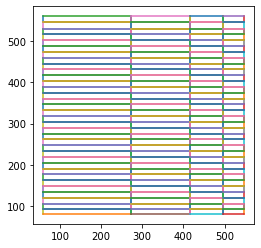

In [4]:
camelot.plot(tables[0], kind='grid').show()

In [47]:
#Transformar PDF a imagenes
import sys, fitz  # import the bindings

doc = fitz.open('test_text.pdf')  # open document
for page in doc:  # iterate through the pages
    pix = page.get_pixmap(dpi=300)  # render page to an image
    pix.save("page-%i.png" % page.number)  # store image as a PNG

In [1]:
''' Prueba verificar si un pdf es texto o imagen '''
import PyPDF2
from PIL import Image

In [73]:
reader = PyPDF2.PdfReader('test_text.pdf')

In [81]:
def es_formato_texto(pdf_path):
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page_num in range(len(reader.pages)):
                page = reader.pages[page_num]
                text = page.extract_text()
                if text.strip() != '':
                    return True
            return False
    except PyPDF2.errors.PdfReadError:
        return False

def es_formato_imagen(pdf_path):
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page_num in range(len(reader.pages)):
                page = reader.pages[page_num]
                if '/XObject' in page['/Resources']:
                    return True
            return False
    except PyPDF2.errors.PdfReadError:
        return False

In [83]:
es_formato_imagen('test_text.pdf')

False

In [51]:
es_formato_texto('test_text.pdf')

TypeError: '_VirtualList' object is not callable

In [90]:
dir_a_leer =  '.\\pdf test\\'
pdf_files = os.listdir(dir_a_leer)

pdf_files


['test_img.pdf', 'test_text.pdf']

In [101]:
def grupo_facturas(directorio):
    archivos_pdf = os.listdir(directorio)
    text_pdf = []
    img_pdf = []
    error_pdf = []
    for pdf in archivos_pdf:
        if es_formato_texto(directorio+pdf):
            text_pdf.append(pdf)
        elif es_formato_imagen(pdf_file):
            img_pdf.append(pdf)
        else:
            error_pdf.append(pdf)
    return text_pdf, img_pdf, error_pdf

In [102]:
texto, imagen, error = grupo_facturas(dir_a_leer)

In [103]:
texto

['139537191.pdf',
 '145774620.pdf',
 '2021-01-09_7328.pdf',
 '2021-01-15_6976.pdf',
 '430027848.pdf',
 '91570399.pdf',
 'test_text.pdf']